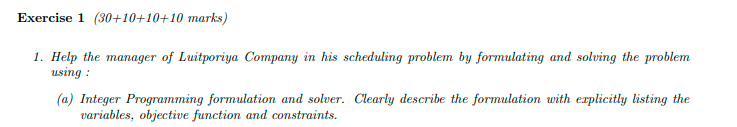

In [2]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 36.7 MB/s eta 0:00:00


In [3]:
from pulp import LpMaximize, LpProblem, LpVariable

# Task data
tasks = [
    {"number": 1, "value": 10, "time": 180},
    {"number": 2, "value": 25, "time": 180},
    {"number": 3, "value": 33, "time": 150},
    {"number": 4, "value": 53, "time": 150},
    {"number": 5, "value": 15, "time": 130},
    {"number": 6, "value": 70, "time": 210},
    {"number": 7, "value": 52, "time": 160},
    {"number": 8, "value": 45, "time": 175},
    {"number": 9, "value": 32, "time": 90},
    {"number": 10, "value": 30, "time": 120},
    {"number": 11, "value": 20, "time": 110},
    {"number": 12, "value": 5, "time": 60},
    {"number": 13, "value": 17, "time": 145},
    {"number": 14, "value": 50, "time": 180},
    {"number": 15, "value": 37, "time": 120},
    {"number": 16, "value": 18, "time": 120},
    {"number": 17, "value": 71, "time": 300},
    {"number": 18, "value": 35, "time": 300},
    {"number": 19, "value": 60, "time": 240},
    {"number": 20, "value": 90, "time": 500},
]

# Create the LP problem
prob = LpProblem("Knapsack", LpMaximize)

# Define decision variables
x = {task["number"]: LpVariable(name=f"x{task['number']}", cat="Binary") for task in tasks}

# Define objective function
prob += sum(task["value"] * x[task["number"]] for task in tasks)

# Define constraint: total time should not exceed 40 hours
prob += sum(task["time"] * x[task["number"]] for task in tasks) <= 40 * 60

# Solve the problem
prob.solve()

# Print the status of the solution
print("Status:", prob.status)

# Print the optimal solution
print("Optimal Schedule:")
for task in tasks:
    if x[task["number"]].value() == 1:
        print(f"Task {task['number']} (Value: {task['value']}, Time: {task['time']} minutes)")

# Print the optimal objective value
print("Total Value:", sum(task["value"] * x[task["number"]].value() for task in tasks))


Status: 1
Optimal Schedule:
Task 3 (Value: 33, Time: 150 minutes)
Task 4 (Value: 53, Time: 150 minutes)
Task 6 (Value: 70, Time: 210 minutes)
Task 7 (Value: 52, Time: 160 minutes)
Task 8 (Value: 45, Time: 175 minutes)
Task 9 (Value: 32, Time: 90 minutes)
Task 10 (Value: 30, Time: 120 minutes)
Task 14 (Value: 50, Time: 180 minutes)
Task 15 (Value: 37, Time: 120 minutes)
Task 17 (Value: 71, Time: 300 minutes)
Task 19 (Value: 60, Time: 240 minutes)
Task 20 (Value: 90, Time: 500 minutes)
Total Value: 623.0


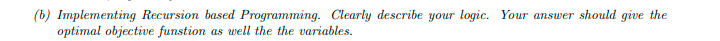

In [9]:
def knapsack_recursion(tasks, n, max_time, task_indices=[], max_value=0, current_time=0):
    # if all the task processed or time is not available
    if n == 0 or current_time >= max_time:
        total_value = sum(tasks[i][1] for i in task_indices)
        return total_value, task_indices

    # Include the current task if it fits within the available time
    if current_time + tasks[n - 1][2] > max_time:
        return knapsack_recursion(tasks, n - 1, max_time, task_indices, max_value, current_time)

    incl_value, incl_indices = knapsack_recursion(tasks, n - 1, max_time, task_indices + [n - 1], max_value, current_time + tasks[n - 1][2])
    excl_value, excl_indices = knapsack_recursion(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Return the maximum value and corresponding task indices
    if incl_value > excl_value:
        return incl_value, incl_indices
    else:
        return excl_value, excl_indices

tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 40*60 #converting in minute
max_value, optimal_task_indices = knapsack_recursion(tasks, len(tasks), max_time)

# Print the results
print("Optimal Task Schedule are")
print("|||||||||||||||||")
for idx in optimal_task_indices:
    print(f"Task {tasks[idx][0]} (Value: {tasks[idx][1]}, Time: {tasks[idx][2]})")

print("||||||||||||||||")
print("Total Value:", max_value)

Optimal Task Schedule are
|||||||||||||||||
Task 20 (Value: 90, Time: 500)
Task 19 (Value: 60, Time: 240)
Task 17 (Value: 71, Time: 300)
Task 15 (Value: 37, Time: 120)
Task 14 (Value: 50, Time: 180)
Task 10 (Value: 30, Time: 120)
Task 9 (Value: 32, Time: 90)
Task 8 (Value: 45, Time: 175)
Task 7 (Value: 52, Time: 160)
Task 6 (Value: 70, Time: 210)
Task 4 (Value: 53, Time: 150)
Task 3 (Value: 33, Time: 150)
||||||||||||||||
Total Value: 623


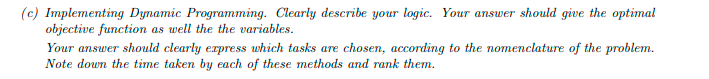

In [19]:
# defining function

def knapsack_dynamic(tasks, max_time):
    n = len(tasks)
    dyn_prog = [[0] * (max_time + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, max_time + 1):
            if tasks[i - 1][2] > j:
                dyn_prog[i][j] = dyn_prog[i - 1][j]
            else:
                dyn_prog[i][j] = max(dyn_prog[i - 1][j], dyn_prog[i - 1][j - tasks[i - 1][2]] + tasks[i - 1][1])

    # Trace back to find the tasks included in the schedule
    selected_tasks = []
    i, j = n, max_time
    while i > 0 and j > 0:
        if dyn_prog[i][j] != dyn_prog[i - 1][j]:
            selected_tasks.append(tasks[i - 1][0])
            j -= tasks[i - 1][2]
        i -= 1
    # Return the maximum value and the selected tasks
    return dyn_prog[n][max_time], selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = knapsack_dynamic(tasks, max_time)

# Print the results
print("Optimal Task Schedule are")
print("||||||||||||||||||")
for task_no in optimal_task_indices:
    print("Task number",task_no)

print("||||||||||||||||||||||||")
print("Maximum value is ", max_value)

Optimal Task Schedule are
||||||||||||||||||
Task number 20
Task number 19
Task number 17
Task number 15
Task number 14
Task number 10
Task number 9
Task number 8
Task number 7
Task number 6
Task number 4
Task number 3
||||||||||||||||||||||||
Maximum value is  623


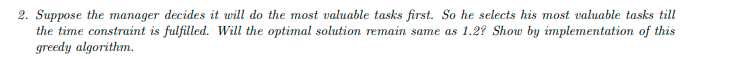

In [24]:
def greaady_algo(max_time, time, value, n):
    max_profit = 0
    selected_items = []

    # Iterate while there's still capacity in the knapsack
    while max_time > 0:
        max_value = 0
        max_index = -1

        # Find the item with the maximum value
        for i in range(n):
          if (i not in selected_items):
            if time[i] <= max_time and value[i] > max_value:
                max_value = value[i]
                max_index = i

        # If no more items can be added, break
        if max_index == -1:
            break

        # Add the item to the knapsack
        max_profit += max_value
        max_time -= time[max_index]
        selected_items.append(max_index)


    #sorting items
    selected_items.sort()
    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items

max_time = 2400

task_no = []
values = []
time = []
n=len(tasks)

for ele in tasks:
  task_no.append(ele[0])
  values.append(ele[1])
  time.append(ele[2])

max_value, selected_tasks = greaady_algo(max_time,time,values,n)

print("Optimal Task Schedule are")
print("|||||||||||||||||||||||||")
for task_no in selected_tasks:
    print(f"Task {task_no}")

print("|||||||||||||||||||||")
print("Total Value:", max_value)

Optimal Task Schedule are
|||||||||||||||||||||||||
Task 4
Task 6
Task 7
Task 8
Task 12
Task 14
Task 15
Task 17
Task 18
Task 19
Task 20
|||||||||||||||||||||
Total Value: 568


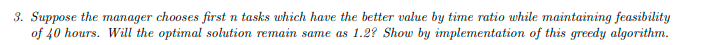

In [26]:
def greaady_alg(max_time, time, value, n):
    # Calculate value per unit weight for each item
    value_per_weight = [(value[i] / time[i], i) for i in range(n)]
    # Sort items based on valueue per unit weight in descending order
    value_per_weight.sort(reverse=True, key=lambda x: x[0])

    max_profit = 0
    selected_items = []


    # Iterate while there's still capacity in the knapsack
    for ratio, index in value_per_weight:
        if max_time >= time[index]:
            max_profit += value[index]
            max_time -= time[index]
            selected_items.append(index)

    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items


max_value, selected_tasks = greaady_alg(max_time,time,values,n)

print("Optimal Task Schedule are")
print("|||||||||||||||||||||||||")
for task_no in selected_tasks:
    print(f"Task {task_no}")

print("|||||||||||||||||||||")
print("Total Value:", max_value)

Optimal Task Schedule are
|||||||||||||||||||||||||
Task 9
Task 4
Task 6
Task 7
Task 15
Task 14
Task 8
Task 10
Task 19
Task 17
Task 3
Task 11
Task 16
Task 2
Task 12
|||||||||||||||||||||
Total Value: 601


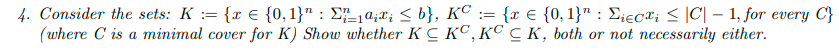

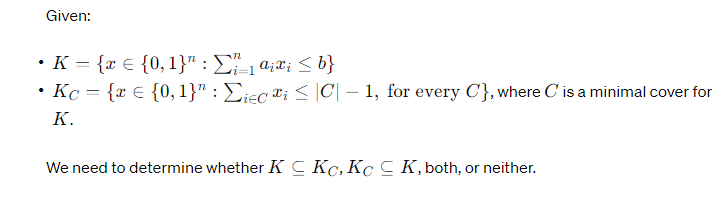

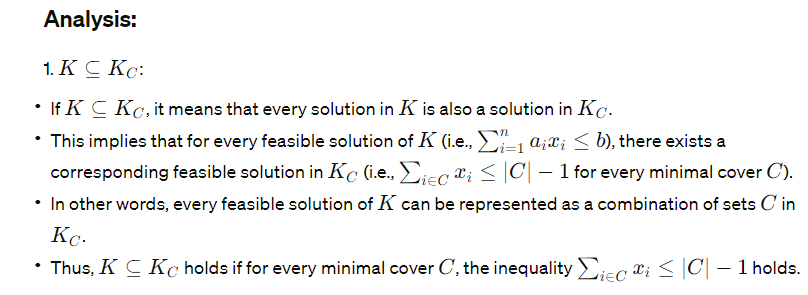

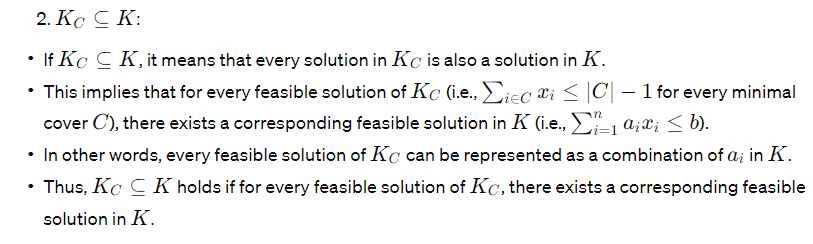

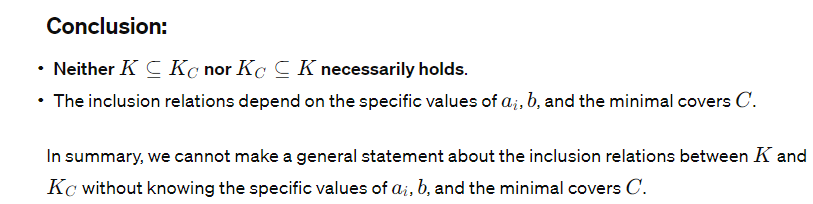